## Logistic Regression Hands-On

In this hands-on we will train a classifier that will learn classify fruits.


> X (Features)  =  [weight, diameter]

> y (Target)  =  [0, 1]

> 1 = apple,  0 = orange


![Logistic_Regression](lr2.png)

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [40]:
fruits_data = pd.read_csv("apple-orange-dataset.csv")

In [41]:
fruits_data.head()

,label,weight,diameter
0,1,136,10.557432
1,1,192,11.292246
2,1,112,10.120368
3,1,185,8.786955
4,1,129,10.070343


In [42]:
fruits_data.shape

(419, 3)

In [43]:
fruits_data.columns

Index(['label', 'weight', 'diameter'], dtype='object')

In [44]:
fruits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 3 columns):
label       419 non-null int64
weight      419 non-null int64
diameter    419 non-null float64
dtypes: float64(1), int64(2)
memory usage: 9.9 KB


In [45]:
fruits_data.label.value_counts()

1    220
0    199
Name: label, dtype: int64

In [46]:
apples = fruits_data[fruits_data.label == 1]
oranges = fruits_data[fruits_data.label == 0]

In [47]:
type(oranges.diameter)

pandas.core.series.Series

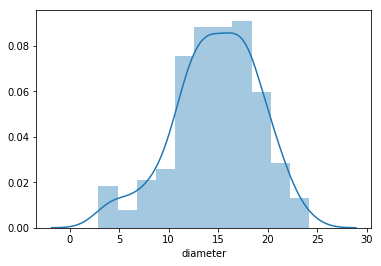

In [48]:
sns.distplot(oranges.diameter)

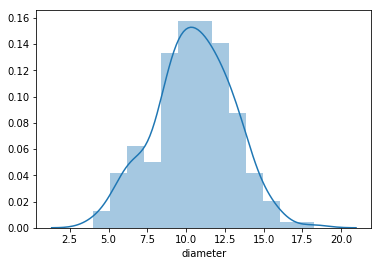

In [50]:
sns.distplot(apples.diameter)

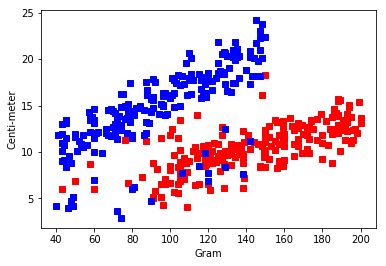

In [71]:
import matplotlib.pyplot as plt

plt.plot(apples['weight'],apples['diameter'], 'rs')
plt.xlabel('Gram')
plt.ylabel('Centi-meter')
plt.plot(oranges['weight'],oranges['diameter'],'bs')

In [73]:
X = fruits_data[['weight', 'diameter']]
y = fruits_data['label']

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [75]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(C=0.1)
logistic_regression.fit(X_train, y_train)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
pred = logistic_regression.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(pred, y_test)

0.9166666666666666

In [84]:
from sklearn.svm import SVC

In [123]:
from sklearn.model_selection import cross_val_score
svc = SVC(0.3)
cv_scores = cross_val_score(svc, X_train, y_train, cv=5)
cv_scores.mean()

0.7526432011067656

In [124]:
svc = SVC(0.3)
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
accuracy_score(y_test, pred)

0.8333333333333334

In [110]:
svc = SVC(C=2, kernel='rbf')
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
accuracy_score(pred, y_test)

0.9166666666666666

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
accuracy_score(pred, y_test)

0.9404761904761905